| ISS Tracker | International Space Station Tracker  |
| ----------- | ----------- |
| ISS API url | http://api.open-notify.org/ |

In [226]:
# libraries
import requests
import pandas as pd
import numpy as np
import folium 
import datetime
# from datetime import datetime
import reverse_geocoder as rg
import pycountry
from IPython.display import Image, display
import time
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
import matplotlib
from IPython.display import Image

In [227]:
"""GET names of astros on-board the ISS"""

# r = requests.get(url='http://api.open-notify.org/astros.json')
# r.json()

# determine the astronaughts, cosmonaughts, etc. that are currently onboard the ISS
astros_url = 'http://api.open-notify.org/astros.json'
astros_response = requests.get(astros_url)
astros_data = astros_response.json()
# print(astros_data)

# print the astros that are onboard the ISS craft
print("Number of people currently aboard the ISS:", astros_data['number'])
print("\nNames of people aboard the ISS:")

for i in astros_data['people']:
    print(i['name'])

Number of people currently aboard the ISS: 10

Names of people aboard the ISS:
Sergey Prokopyev
Dmitry Petelin
Frank Rubio
Fei Junlong
Deng Qingming
Zhang Lu
Stephen Bowen
Warren Hoburg
Sultan Alneyadi
Andrey Fedyaev


In [228]:
"""GET the current location of the ISS"""

# send a GET request to the ISS API endpoint
iss_loc_response = requests.get("http://api.open-notify.org/iss-now.json")
iss_loc_data = (iss_loc_response.json())
# print the API parameters
# print(iss_loc_data)

# extract the latitude and longitude for the current location of the ISS
time_stamp = iss_loc_data['timestamp']
iss_lat = float(iss_loc_data['iss_position']['latitude']) # also, converts lat string to float
iss_long = float(iss_loc_data['iss_position']['longitude']) # also, converts long string to float

# print the current latitude and longitude for the ISS
print(f"Timestamp: {time_stamp}")
print()
print("Current ISS Location:")
print(f"Latitude: {iss_lat}")
print(f"Longitude: {iss_long}")

Timestamp: 1679000560

Current ISS Location:
Latitude: 45.4315
Longitude: 62.4659


In [229]:
# find the nearest country using reverse_geocoder
coordinates = (iss_lat, iss_long)
results = rg.search(coordinates)
# print(results)

# print the nearest country
city = results[0]['name']
state_provence = results[0]['admin1']
country_code = results[0]['cc']

# convert country code to full country name
country = pycountry.countries.get(alpha_2=country_code)
country_name = country.name

print()
print(f"Nearest country: {city}, {state_provence}, {country_code}")
print(f"Country Code: {country_code} = {country_name}")

# display the country flag based on the country code
flag_url = f"https://flagcdn.com/w320/{country_code.lower()}.png"
display(Image(url=flag_url))


Nearest country: Qazaly, Qyzylorda, KZ
Country Code: KZ = Kazakhstan



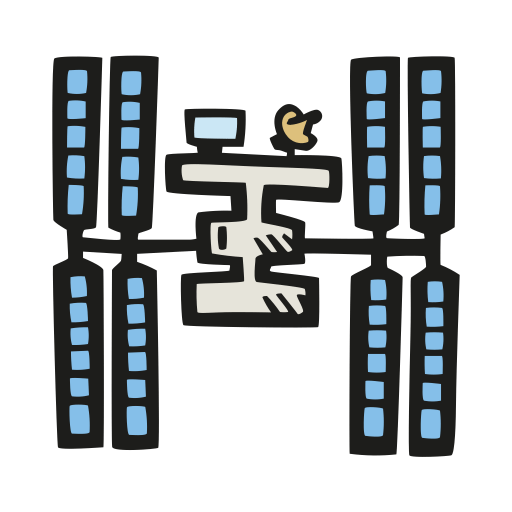

In [230]:
# create a map centered on teh ISS's current location
map = folium.Map(location=[iss_lat,iss_long], tiles='stamentoner', zoom_start=3)

# create a custom icon
icon = folium.features.CustomIcon('iss_icon2.png', icon_size=(25,25))
# add marker to map with custom icon
folium.Marker([iss_lat, iss_long], icon=icon).add_to(map)

# display map
display(map)

In [231]:
# look at an example of the unique timestamp (you can use this as your unique time KEY)
date_save_as = datetime.datetime.now().strftime("%Y%m%d%H%M%S")
print(f"The time right now is: {date_save_as}") # you will use this later to save your output csv file

The time right now is: 20230316140242


In [232]:
record_data_ON = True # manually toggle this True / False
if record_data_ON == True:
    date_save_as = datetime.datetime.now().strftime("%Y%m%d%H%M%S")
    starttime = time.time()

    iss_rt_tracking_data = []
    counter = 1  # initialize the counter variable

    while True:
        iss_loc_response = requests.get("http://api.open-notify.org/iss-now.json")
        iss_loc_data = iss_loc_response.json()
        print(f"Round {counter}: {iss_loc_data}")  # print the counter value and the data

        iss_rt_tracking_data.append([iss_loc_data['timestamp'],
                                     iss_loc_data['iss_position']['latitude'],
                                     iss_loc_data['iss_position']['longitude']
                                     ])

        # dump data to csv file
        dump_cols = ['time_stamp', 'lat', 'long']
        tmp_iss_df = pd.DataFrame(iss_rt_tracking_data, columns=dump_cols)
        tmp_iss_df.to_csv('ISS_location_' + date_save_as + '.csv', index=None)

        # save the file name to a var so that later I can call it with read_csv()
        iss_flight_record_file = 'ISS_location_' + date_save_as + '.csv'

        # increment the counter variable
        counter += 1

        # collect 10mins of data
        if len(iss_rt_tracking_data) > 10: # 10mins (11 rounds starting from zero)
            break

        # safety break
        # if len(iss_rt_tracking_data) > 18000:
        #     break

        # set sleep timer -> will record one data point every minute (60 seconds) or whatever you adjust it to
        time.sleep(60.0 - ((time.time()-starttime) % 60.0))


Round 1: {'timestamp': 1679000561, 'message': 'success', 'iss_position': {'longitude': '62.5821', 'latitude': '45.3861'}}
Round 2: {'timestamp': 1679000621, 'message': 'success', 'iss_position': {'longitude': '67.0691', 'latitude': '43.4669'}}
Round 3: {'timestamp': 1679000682, 'message': 'success', 'iss_position': {'longitude': '71.2508', 'latitude': '41.3643'}}
Round 4: {'timestamp': 1679000742, 'message': 'success', 'iss_position': {'longitude': '75.1444', 'latitude': '39.1025'}}
Round 5: {'timestamp': 1679000802, 'message': 'success', 'iss_position': {'longitude': '78.7724', 'latitude': '36.7030'}}
Round 6: {'timestamp': 1679000861, 'message': 'success', 'iss_position': {'longitude': '82.1322', 'latitude': '34.2069'}}
Round 7: {'timestamp': 1679000921, 'message': 'success', 'iss_position': {'longitude': '85.3054', 'latitude': '31.5892'}}
Round 8: {'timestamp': 1679000982, 'message': 'success', 'iss_position': {'longitude': '88.2877', 'latitude': '28.8855'}}
Round 9: {'timestamp': 1

In [233]:
# verfify file name string
iss_flight_record_file = 'ISS_location_' + date_save_as + '.csv'
print(iss_flight_record_file)
print(type(iss_flight_record_file))

ISS_location_20230316140242.csv
<class 'str'>


In [234]:
# load historical data
iss_flight_record = pd.read_csv(iss_flight_record_file)

print(iss_flight_record)
print(iss_flight_record.shape)

    time_stamp      lat     long
0   1679000561  45.3861  62.5821
1   1679000621  43.4669  67.0691
2   1679000682  41.3643  71.2508
3   1679000742  39.1025  75.1444
4   1679000802  36.7030  78.7724
5   1679000861  34.2069  82.1322
6   1679000921  31.5892  85.3054
7   1679000982  28.8855  88.2877
8   1679001042  26.1088  91.1032
9   1679001102  23.2704  93.7743
10  1679001162  20.3806  96.3218
(11, 3)


In [235]:
"""
The timestamp 1678990112 represents a specific point in time, 
measured in seconds since the Unix epoch, which is January 1, 1970, 00:00:00 UTC
"""
# test list comprehension
[d for d in iss_flight_record['time_stamp']]

[1679000561,
 1679000621,
 1679000682,
 1679000742,
 1679000802,
 1679000861,
 1679000921,
 1679000982,
 1679001042,
 1679001102,
 1679001162]


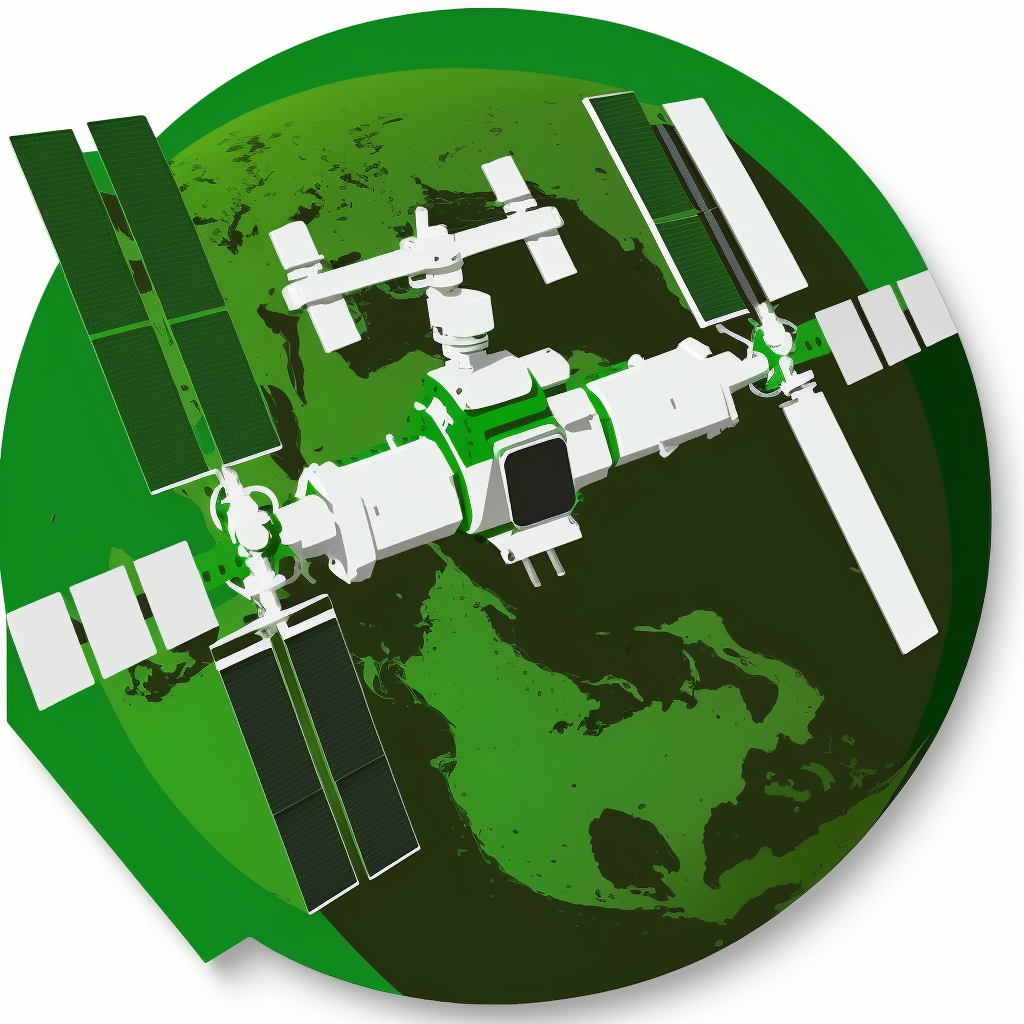

In [248]:
# look at other map types -> I like the precipitation layer

# create a map centered on the ISS's current location with the Esri World Imagery base map
esri_imagery_tiles = "https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}"
map2 = folium.Map(location=[iss_lat, iss_long], tiles=esri_imagery_tiles, attr="Esri", name="Esri World Imagery", zoom_start=3)

# add the OpenSeaMap nautical tile layer
openseamap_tiles = "https://tiles.openseamap.org/seamark/{z}/{x}/{y}.png"
nautical_layer = folium.TileLayer(tiles=openseamap_tiles, attr="OpenSeaMap", name="Nautical Chart")
nautical_layer.add_to(map2)

# add an OpenWeatherMap precipitation overlay
owm_precipitation_tiles = "https://tile.openweathermap.org/map/precipitation_new/{z}/{x}/{y}.png?appid=YOUR_OWM_API_KEY" # need the api key
precipitation_layer = folium.TileLayer(tiles=owm_precipitation_tiles, attr="OpenWeatherMap", name="Precipitation", overlay=True)
precipitation_layer.add_to(map2)

# add a layer control to switch between base maps and overlays
folium.LayerControl().add_to(map2)

# areate a custom icon
icon = folium.features.CustomIcon('iss_t_green_now.png', icon_size=(25, 25))

# add a marker to the map with the custom icon
folium.Marker([iss_lat, iss_long], icon=icon).add_to(map2)

# aisplay the map
map2

In [236]:
# re-import this function to get the fromtimestamp()function
from datetime import datetime

"""
Convert thetimestamp to a datetime object using the datetime library, 
to determine the exact date and time that it corresponds to
"""
date_time = [datetime.fromtimestamp(dt) for dt in iss_flight_record['time_stamp']]

# date_time

# pass date_time back to the original df as a new feature called 'date'
iss_flight_record['date'] = date_time

# add a plot size from oldest to newest
iss_flight_record['index'] = range(1,len(iss_flight_record)+1)

# look at the df
iss_flight_record.head()

,time_stamp,lat,long,date,index
0,1679000561,45.3861,62.5821,2023-03-16 14:02:41,1
1,1679000621,43.4669,67.0691,2023-03-16 14:03:41,2
2,1679000682,41.3643,71.2508,2023-03-16 14:04:42,3
3,1679000742,39.1025,75.1444,2023-03-16 14:05:42,4
4,1679000802,36.7030,78.7724,2023-03-16 14:06:42,5


In [237]:
# reorder the df columns 
iss_fr_df_cols = ['index','time_stamp','date','lat','long']
iss_fr_df = iss_flight_record.reindex(columns=iss_fr_df_cols)

iss_fr_df

,index,time_stamp,date,lat,long
0,1,1679000561,2023-03-16 14:02:41,45.3861,62.5821
1,2,1679000621,2023-03-16 14:03:41,43.4669,67.0691
2,3,1679000682,2023-03-16 14:04:42,41.3643,71.2508
3,4,1679000742,2023-03-16 14:05:42,39.1025,75.1444
4,5,1679000802,2023-03-16 14:06:42,36.7030,78.7724
5,6,1679000861,2023-03-16 14:07:41,34.2069,82.1322
6,7,1679000921,2023-03-16 14:08:41,31.5892,85.3054
7,8,1679000982,2023-03-16 14:09:42,28.8855,88.2877
8,9,1679001042,2023-03-16 14:10:42,26.1088,91.1032
9,10,1679001102,2023-03-16 14:11:42,23.2704,93.7743


In [238]:
iss_trail_coords = iss_fr_df.iloc[:,3:]

iss_trail_coords

,lat,long
0,45.3861,62.5821
1,43.4669,67.0691
2,41.3643,71.2508
3,39.1025,75.1444
4,36.7030,78.7724
5,34.2069,82.1322
6,31.5892,85.3054
7,28.8855,88.2877
8,26.1088,91.1032
9,23.2704,93.7743


In [239]:
# # create a map centered on teh ISS's current location
# map3 = folium.Map(location=[iss_lat,iss_long], tiles='stamentoner', zoom_start=3)

# # create a custom icon
# icon = folium.features.CustomIcon('iss_icon2.png', icon_size=(25,25))
# # add marker to map with custom icon
# folium.Marker([iss_lat, iss_long], icon=icon).add_to(map)

# folium.PolyLine(iss_trail_coords,tooltip='Coast').add_to(map2)
# # display map
# display(map3)

| ISS Information | General |
| ----------- | ----------- |

* 90 minutes to complete 1 rotation around the earth
* The distance at which the ISS is visible from the ground depends on various factors such as the altitude of the ISS, the brightness of the ISS, the lighting conditions, and the weather conditions. Generally, the ISS is visible from the ground at a maximum distance of around 2,000 kilometers (1,200 miles) under ideal viewing conditions.
* The ISS is in low-earth orbit, so it won't maintain a specific ground-track along the earth.
* Technically speaking, the ISS is both a satellite and a spacecraft, but it is not a conventional satellite in the sense that it was not designed to orbit the Earth on its own.
    * Therefore, while the ISS does technically qualify as a satellite, it is more commonly referred to as a spacecraft or space station to differentiate it from other types of satellites.
* TLE stands for "Two-Line Element" and it is a data format used to describe the orbit of a satellite. 
    * The TLE format was developed by the United States Department of Defense to describe the orbits of objects in Earth orbit, such as satellites and space debris.
    * Computer programs used to track satellites take into account factors such as the Earth's rotation, gravitational forces, and atmospheric drag to predict the satellite's location and movement over time.

| ISS Important Variables |
| ----------- |
1. TIME - is when the sighting opportunity will begin in your local time zone. All sightings will occur within a few hours before or after sunrise or sunset. This is the optimum viewing period as the sun reflects off the space station and contrasts against the darker sky.

2. VISIBLE - is the maximum time period the space station is visible before crossing back below the horizon.

3. MAX_HEIGHT - is measured in degrees (also known as elevation). It represents the height of the space station from the horizon in the night sky. The horizon is at zero degrees, and directly overhead is ninety degrees. If you hold your fist at arm's length and place your fist resting on the horizon, the top will be about 10 degrees.

4. APPEARS - is the location in the sky where the station will be visible first. This value, like maximum height, also is measured in degrees from the horizon. The letters represent compass directions -- N is north, WNW is west by northwest, and so on.

5. DISSAPEARS - represents where in the night sky the International Space Station will leave your field of view.

| Coding Considerations / Planning & Ideas |
| ----------- |
* What if we plot which country has the most passes (day or night). That would be cool, I haven't seen someone do that before
* XXX



| END OF PROGRAM | 
| ----------- |